In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import requests
from datetime import datetime
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [8]:
# Funcion
def convertir_fecha(fecha_str):
    try:
        datetime.strptime(fecha_str, '%Y-%m-%d')
        return fecha_str
    except:
        if type(fecha_str) == str:
            fecha_str = fecha_str.replace('*','')
            meses = {
                'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4,
                'may': 5, 'jun': 6, 'jul': 7, 'ago': 8,
                'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}
            partes = fecha_str.split('-')
            mes_str = partes[0].lower()
            año = int(partes[1])
            mes = meses[mes_str]
            fecha = pd.to_datetime(f'{año}-{mes}-01')
            return fecha
convertir_fecha('2020-10-10')
def arrow_text(value):
    if value > 0:
        return ('▲',str(int(np.round(value,0))),'green')
    else:
        return ('▼',str(int(np.round(value,0))),'red')
def annot_arrows(ax2,col):
    arrow_values = arrow_text(df[f'{col}'].iloc[-1])
    ax2.annotate(
    # text=df.iloc[-1]['total_con_estacionalidad'],
    text= arrow_values[0],
    xy=(df['fecha'].iloc[-1] - relativedelta(months=3),df[f'{col}'].iloc[-1] + 10),
    fontsize= 8,
    **annot_props,
    color=arrow_values[2]
    )
    ax2.annotate(
        # text=df.iloc[-1]['total_con_estacionalidad'],
        text= arrow_values[1].replace('.',','),
        xy=(df['fecha'].iloc[-1],df[f'{col}'].iloc[-1] + 10),
        fontsize= 9,
        **annot_props,
        color='black'
    )

In [ ]:
df = pd.read_csv('../series-tiempo-metadatos.csv')

In [4]:
a = [i for i in df['serie_titulo'].unique()]
for i in a:
    print(i)

NameError: name 'df' is not defined

IDS

In [14]:
df[(df['serie_titulo'] == 'total_sin_estac')|(df['serie_titulo'] == 'total_estacionalidad')]['serie_id']

3041    151.1_TL_ESTADAD_2012_M_20
3042    151.1_TL_SIN_TAC_2012_M_15
Name: serie_id, dtype: object

# Si viene de la API


In [17]:
def get_series():
    today = datetime.today().strftime('%Y-%m-%d')
    columns = ['fecha','total_con_estacionalidad','total_sin_estacionalidad']
    ids_generales = ','.join(['151.1_TL_ESTADAD_2012_M_20','151.1_TL_SIN_TAC_2012_M_15'])
    response = requests.get(url=f'https://apis.datos.gob.ar/series/api/series?ids={ids_generales}&start_date=2009-01-01&end_date={today}&limit=5000')
    res = json.loads(response.text)
    empleo_registrado = pd.DataFrame(res['data'],columns=columns)
    return empleo_registrado

In [18]:
df = get_series()

In [25]:
df['Variación mensual %'] = df['total_sin_estacionalidad'].pct_change()
df['Variación mensual'] = df['total_sin_estacionalidad'].diff()
df['Variación interanual %'] = df['total_con_estacionalidad'].pct_change(12)
df['Variación interanual'] = df['total_con_estacionalidad'].diff(12)

In [26]:
df

,fecha,total_con_estacionalidad,total_sin_estacionalidad,Variación mensual,Variación interanual,Variación mensual %,Variación interanual %
0,2012-01-01,10931.297,10897.574,NaN,NaN,NaN,NaN
1,2012-02-01,10982.740,10954.779,57.205,NaN,0.005249,NaN
2,2012-03-01,10992.215,10977.692,22.913,NaN,0.002092,NaN
3,2012-04-01,10948.397,10972.433,-5.259,NaN,-0.000479,NaN
4,2012-05-01,10928.501,10959.703,-12.730,NaN,-0.001160,NaN
...,...,...,...,...,...,...,...
140,2023-09-01,13390.605,13395.137,27.790,490.593,0.002079,0.038030
141,2023-10-01,13397.347,13391.995,-3.142,443.210,-0.000235,0.034214
142,2023-11-01,13362.576,13341.145,-50.850,320.568,-0.003797,0.024580
143,2023-12-01,13402.741,13363.961,22.816,311.910,0.001710,0.023827


# Si viene de Excel

In [11]:
f_name = 'general.xlsx'
df = pd.read_excel(f_name,sheet_name='serie_general')
df['fecha'] = pd.to_datetime(df['fecha'])
# df.columns = [i.replace('ó','o') for i in df.columns]
# df['fecha'] = df['fecha'].apply(convertir_fecha)
df.columns

Index(['fecha', 'total_con_estacionalidad', 'total_sin_estacionalidad',
       'Variación mensual %', 'Variación interanual %', 'Variación mensual',
       'Variación interanual '],
      dtype='object')

# Plots

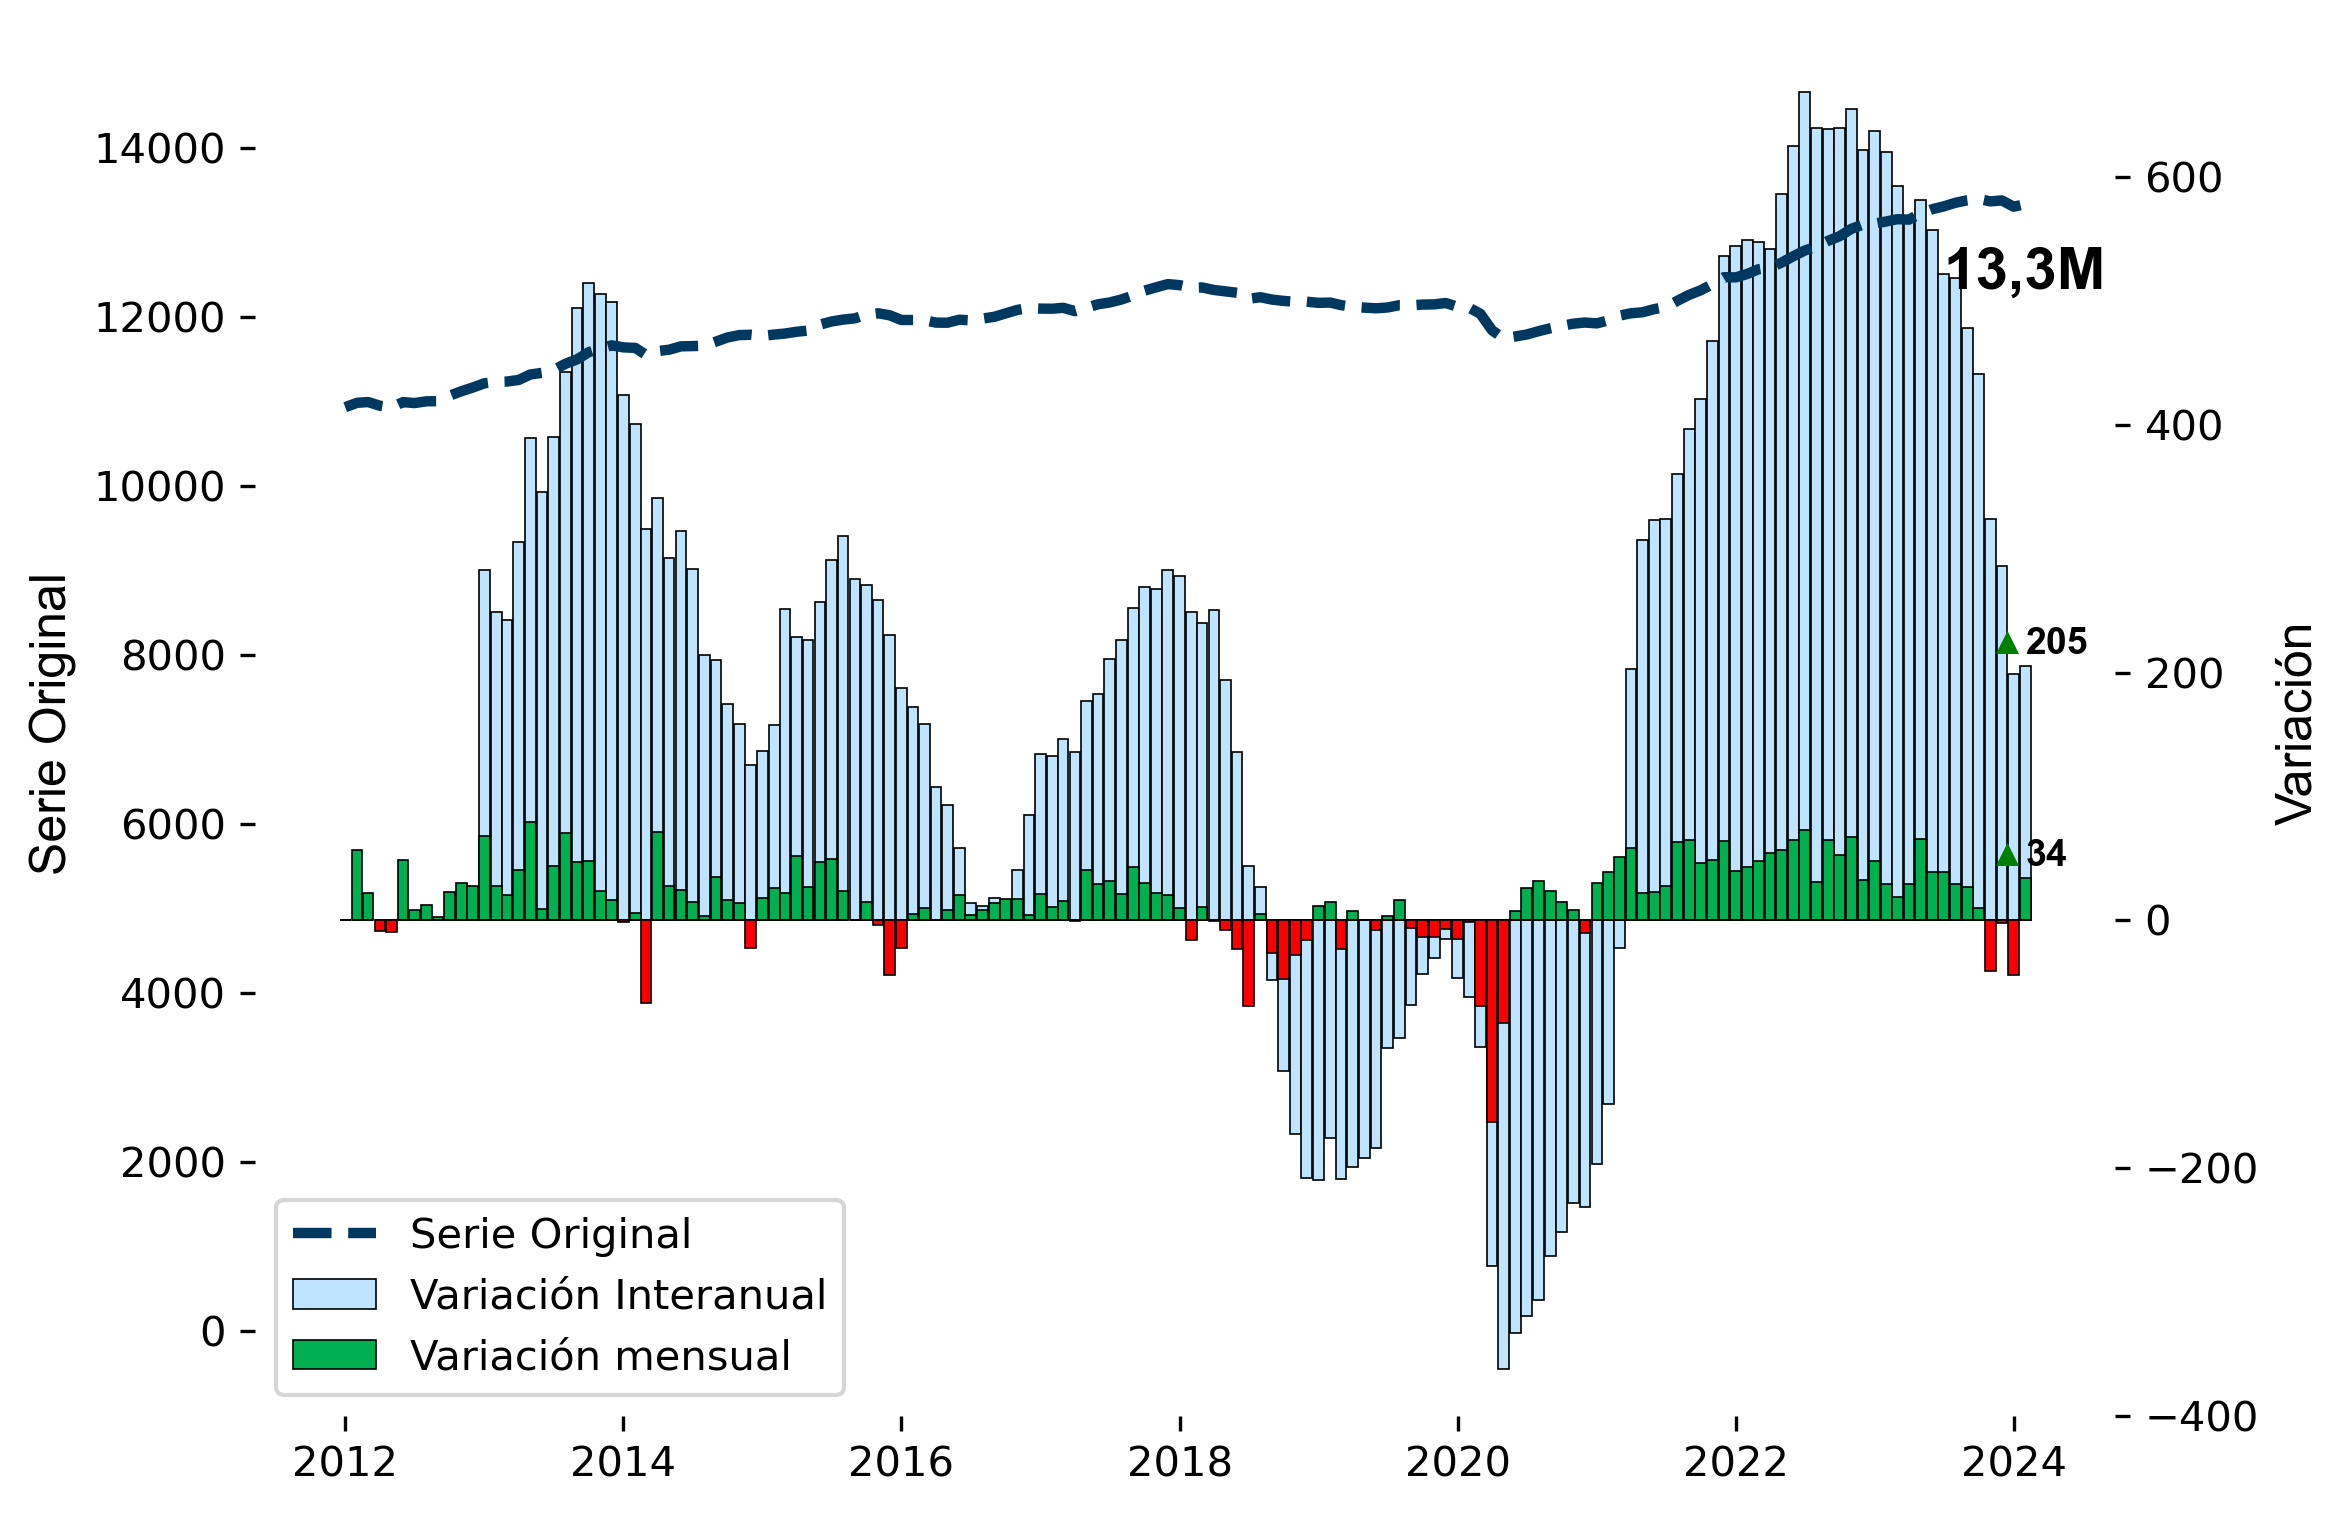

In [12]:
fig,ax = plt.subplots(dpi=300,figsize=(8,6),frameon=False,facecolor='white')
df['Variación mensual +'] = np.where(df['Variación mensual'] > 0, df['Variación mensual'],0)
df['Variación mensual -'] = np.where(df['Variación mensual'] < 0, df['Variación mensual'],0)
ax2 = ax.twinx()
ax2.set_ylim([df['Variación interanual '].min(),df['Variación interanual '].max()])
# sns.barplot(df,x='fecha',y='Variación interanual ',ax = ax2)
ax.set_ylim([-1000,df['total_con_estacionalidad'].max() + 2000])
ax2.set_ylim([-400,df['Variación interanual '].max() + 50])
ax2.bar(df['fecha'],df['Variación interanual '],color='#bfe4ff',width=28,edgecolor='black',linewidth=0.4,alpha=1,zorder=0)
ax2.bar(df['fecha'],df['Variación mensual +'],color='#00b050',width=28,edgecolor='black',linewidth=0.4,zorder=0)
ax2.bar(df['fecha'],df['Variación mensual -'],color='#fb0000',width=28,edgecolor='black',linewidth=0.4,zorder=0)
# ax2.set_ylim([df['Variación mensual'].min() - 200,df['Variación mensual'].max() + 200])
my_plot = ax.plot(df['fecha'],df['total_con_estacionalidad'],color='#003860',ls = '--',linewidth = 2.5)
bar_plot_patches = ax.patches
ax.set_zorder(ax2.get_zorder()+1)
ax.set_frame_on(False)
fig.set_frameon(True)
# sns.lineplot(df,x = 'fecha',y = 'total_con_estacionalidad',ax=ax)
plt.axis('on')
fig.set_facecolor('white')
(ya,) = df.iloc[-1]['total_con_estacionalidad'],

annot_props = dict(
    xycoords = 'data',
    fontweight = 'bold',
    fontfamily = 'Arial'
)
#Nro grande de la serie Original
ax.annotate(
    # text=df.iloc[-1]['total_con_estacionalidad'],
    text=str(np.round(df.iloc[-1]['total_con_estacionalidad']/1000,1)).replace('.',',') + 'M',
    xy=(df['fecha'].iloc[-1] - relativedelta(months=7),ya-1000),
    # xy=(0.5,0.5),
    fontsize= 14,
    **annot_props
)
#Bordes
for pos in ['right', 'top', 'bottom', 'left']: 
    ax.spines[pos].set_visible(False)
    ax2.spines[pos].set_visible(False)  
ylab_params = dict(
    fontsize=12,
    fontfamily='Arial'
)
#Detalles de los ejes
ax.set_ylabel('Serie Original',**ylab_params)
ax2.set_ylabel('Variación',**ylab_params)
#Flechas verdes y rojas
annot_arrows(ax2,'Variación interanual ')
annot_arrows(ax2,'Variación mensual')

ax2.legend(['Variación Interanual','Variación mensual'])

ax2.plot([], [],ls='--', label='Serie Original',color='#003860',linewidth=2.5) #Agregar plot fantasma para tener otra leyenda
ax2.legend(['Serie Original','Variación Interanual','Variación mensual'])
fig.savefig('Graficos/gral.png',bbox_inches='tight')